# Findings: transitivity system/experiential meaning.

The previous notebook contained findings from an investigation of the Mood system, via constituency grammar.

This notebook looks at the Transitivity system, using dependency grammar.

Refer to the introductory notebook for further information about running the investigations yourself locally.

<!-- MarkdownTOC -->

- [Getting started](#getting-started)
- [Loading data from file](#loading-data-from-file)
- [Transitivity features](#transitivity-features)
  - [Key participants](#key-participants)
  - [Jargonisation](#jargonisation)
  - [Metadiscourse](#metadiscourse)
  - [Vague language](#vague-language)
  - [Key processes](#key-processes)
  - [Being and having bipolar](#being-and-having-bipolar)
  - [Diagnose as process](#diagnose-as-process)
  - [Self as agent](#self-as-agent)
- [Human agency](#human-agency)
- [Verbal processes](#verbal-processes)
- [Accounting for self-selection](#accounting-for-self-selection)
  - [Posts per year images](#posts-per-year-images)

<!-- /MarkdownTOC -->

<a name="getting-started"></a>
## Getting started

Before we start doing anything substantial, we need to set some display options,
and import some modules:

In [1]:
# table viewing parameters
import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', None)
pd.set_option('display.precision', 2)
pd.set_option('expand_frame_repr', True)

# display html table
from IPython.display import display, HTML

# move to correct directory
import os
os.chdir('/Users/daniel/work/new_thesis/')

# allow interactive inline images
%matplotlib inline

With this done, we are ready to import *corpkit*, and create an object
representing our four corpora, which have already been parsed:

In [2]:
# corpus and interrogation classes
from corpkit import *
# wordlists
from corpkit.dictionaries import *

In [3]:
# load saved adds saved interrogations as attributes
corpora = Corpora('data', load_saved=True)

Corpus: /Users/daniel/Work/new_thesis/data/C-parsed
Corpus: /Users/daniel/Work/new_thesis/data/L-parsed
	Loaded P-parsed-agents.p as agents attribute.
	Loaded P-parsed-am-am-not2.p as am_am_not2 attribute.
	Loaded P-parsed-and_or.p as and_or attribute.
	Loaded P-parsed-behave.p as behave attribute.
	Loaded P-parsed-bpwords.p as bpwords attribute.
	Loaded P-parsed-conj-diag.p as conj_diag attribute.
	Loaded P-parsed-diag-pos.p as diag_pos attribute.
	Loaded P-parsed-diagnose.p as diagnose attribute.
	Loaded P-parsed-features-old.p as features_old attribute.
	Loaded P-parsed-five-arcs.p as five_arcs attribute.
	Loaded P-parsed-four-arcs.p as four_arcs attribute.
	Loaded P-parsed-four-part-coref.p as four_part_coref attribute.
	Loaded P-parsed-four-part-count.p as four_part_count attribute.
	Loaded P-parsed-friends_and_family.p as friends_and_family attribute.
	Loaded P-parsed-health_professional.p as health_professional attribute.
	Loaded P-parsed-jargon.p as jargon attribute.
	Loaded P-

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """remove extreme values from colourmap"""
    import matplotlib.colors as colors
    import numpy as np
    new_cmap = colors.LinearSegmentedColormap.from_list(
    'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
    cmap(np.linspace(minval, maxval, n)))
    return new_cmap

import matplotlib.pyplot as plt
cmap = truncate_colormap(plt.get_cmap('viridis'), 0.2, 0.7)

<a name="loading-data-from-file"></a>
## Loading data from file

Investigations take a long time to run. This cell maps saved data to the local
namespace. It's only useful if you have saved the interrogations.

Interrogations can take hours on a small machine. Therefore, after an interrogation
has been run, it is saved, and loaded as a corpus attribute in the cell above.

To save some time, we can map some loaded interrogations to the local namespace. If you're 
running this notebook locally, and haven't got the saved data, you don't need to run the
following cell.

In [5]:
sents = corpora.P.sents_with_verb
modals_w = corpora.P.modals_w
modals_l = corpora.P.modals_l
modal_configs = corpora.P.modal_configs
pronountense = corpora.P.pronoun_tense
tense = corpora.P.tense
#negation = corpora.P.negation
mp = corpora.P.mod_pol
#sp = corpora.P.sub_pol
participants = corpora.P.participants
nom_participants = corpora.P.parts_minimal
processes=corpora.P.processes
behave = corpora.P.behave.results
diag = corpora.P.diagnose
#expdiag = corpora.P.raw_diag
diagwc = corpora.P.diag_pos
left_participant_in = corpora.P.left_participant_in
right_participant_in = corpora.P.right_participant_in
and_or = corpora.P.and_or
counts = corpora.P.four_part_count
part_configs = {'The self': corpora.P.self,
                'Other members':  corpora.P.other_members,
                'Health professionals':  corpora.P.health_professional,
                'Friends and family': corpora.P.friends_and_family}

<a name="transitivity-features"></a>
## Transitivity features

The next part of the case study is an investigation of transitivity choices in
the community. The transitivity system is used to construe things and events in
the world.

A key difference is that we switch from searching constituency to dependency
grammar, as dependencies provide richer transitivity information than syntax
trees. We also draw more heavily on keywording and heatmaps.

<a name="key-participants"></a>
### Key participants

First, we'll look at *participants* in the field of discourse.

*corpkit* has lists of dependency functions that correspond to systemic
functional concepts:

In [10]:
from corpkit.dictionaries import *
roles.event

['acl', 'acl(_|:)relcl', 'advcl', 'ccomp', 'cop', 'root']

Using these roles, we construct dependency queries. The query below returns any
lemma whose function is participant-like.

In [ ]:
q = {F: roles.participant}
participants = corpus.interrogate(show=L)

Pronouns and proper nouns dominate these results. We can remove them by adding a
part-of-speech tag to match:

In [ ]:
q = {F: roles.participant, P: r'^NN[^P]*'}
nom_participants = corpus.interrogate(q, show=L)

Next, we'll generate relative frequencies, excluding closed class words.

In [1]:
from corpkit import *
from corpkit.dictionaries import *
%matplotlib inline
participants = load('../new_thesis/saved_interrogations/P-parsed-participants.p')
nopro = participants.edit(just_entries=r'[A-Za-z0-9]',
                          skip_entries=wordlists.closedclass, keep_top=1000)

In [2]:
nopro_inc = nopro.edit('%', participants.totals, sort_by='increase')
nopro_dec = nopro.edit('%', participants.totals, sort_by='decrease')

In [3]:
from corpkit.interrogation import Interrodict
idc = Interrodict({'increasing': nopro_inc.results.iloc[:20,:20],
                   'decreasing': nopro_dec.results.iloc[:20,:20]})


00:57:11: images/part-traj2.png created.


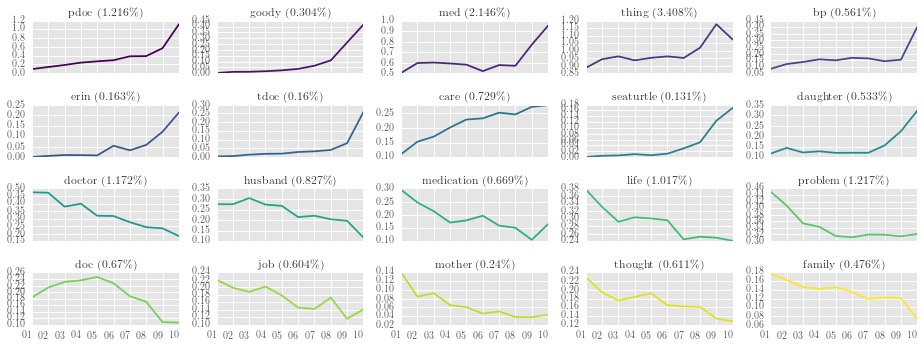

In [8]:
newd = nopro_inc.results.T.iloc[:10,:10].append(nopro_dec.results.T.iloc[:10,:10])

interest = list(newd.index)
newnames = ['%s (%s\%%)' % (x, nopro_inc.totals[x].round(3)) for x in interest]
newd = newd.T
newd.columns = newnames
newd = newd.T
#newd

newd.T.visualise(subplots=True, layout=(4,5), colours='viridis', figsize=(13,5), show_totals='legend',
                 x_label='Membership stage', y_label='Percentage of all participants', save='part-traj2').show()

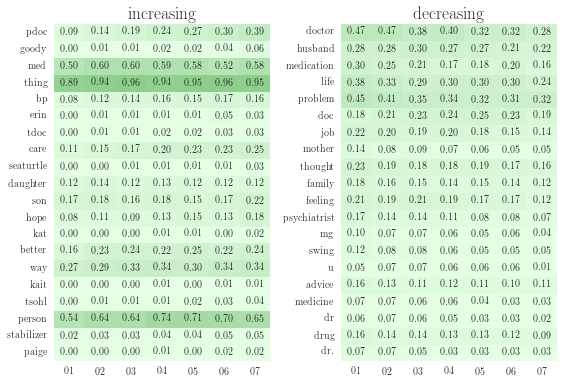

In [5]:
plt = idc.visualise(kind='heatmap', shape=(1,2), vmax=2.5, figsize=(12,5), robust=True)
plt.tight_layout()
plt.show()

In [68]:
nopro_rel = nopro.edit('%', participants.totals, sort_by=')
#nopro_rel.visualise(colours='viridis').show()

,pdoc,goody,doctor,med,thing,bp,erin,tdoc,care,husband,seaturtle,daughter,medication,son,hope,...,opinion,ok,place,condition,friend,lol,dosage,alot,here,sense,guy,list,go,symptom,year
01,0.09,1.75e-03,0.47,0.50,0.89,0.08,8.74e-04,4.37e-03,0.11,0.28,4.37e-04,0.12,0.30,0.17,0.08,...,0.04,0.04,0.05,0.03,0.27,0.02,0.05,0.12,0.04,0.09,0.09,0.03,0.03,0.21,0.10
02,0.14,1.18e-02,0.47,0.60,0.94,0.12,5.88e-03,5.88e-03,0.15,0.28,4.70e-03,0.14,0.25,0.18,0.11,...,0.03,0.03,0.04,0.04,0.23,0.04,0.04,0.13,0.03,0.09,0.08,0.04,0.04,0.17,0.07
03,0.19,1.24e-02,0.38,0.60,0.96,0.14,1.00e-02,1.42e-02,0.17,0.30,5.90e-03,0.12,0.21,0.16,0.09,...,0.04,0.05,0.06,0.05,0.23,0.05,0.05,0.12,0.04,0.10,0.09,0.04,0.04,0.16,0.09
04,0.24,1.71e-02,0.40,0.59,0.94,0.16,9.71e-03,1.88e-02,0.20,0.27,1.03e-02,0.13,0.17,0.18,0.13,...,0.04,0.04,0.05,0.04,0.23,0.05,0.05,0.11,0.03,0.10,0.08,0.03,0.04,0.14,0.07
05,0.27,2.48e-02,0.32,0.58,0.95,0.15,8.26e-03,2.01e-02,0.23,0.27,6.49e-03,0.12,0.18,0.15,0.15,...,0.04,0.05,0.05,0.03,0.19,0.08,0.05,0.11,0.04,0.11,0.08,0.04,0.04,0.15,0.08
06,0.30,3.71e-02,0.32,0.52,0.96,0.17,5.42e-02,2.95e-02,0.23,0.21,1.18e-02,0.12,0.20,0.17,0.13,...,0.05,0.05,0.06,0.03,0.20,0.06,0.05,0.10,0.04,0.10,0.09,0.04,0.04,0.15,0.08
07,0.39,6.43e-02,0.28,0.58,0.95,0.16,3.25e-02,3.31e-02,0.25,0.22,3.00e-02,0.12,0.16,0.22,0.18,...,0.04,0.05,0.05,0.03,0.20,0.05,0.04,0.09,0.03,0.11,0.09,0.04,0.04,0.13,0.08
08,0.39,1.10e-01,0.24,0.57,1.02,0.14,5.82e-02,4.11e-02,0.25,0.20,5.08e-02,0.16,0.15,0.20,0.18,...,0.04,0.06,0.05,0.03,0.22,0.03,0.04,0.09,0.04,0.10,0.11,0.04,0.04,0.16,0.08
09,0.57,2.64e-01,0.23,0.77,1.18,0.15,1.21e-01,7.99e-02,0.27,0.20,1.25e-01,0.22,0.10,0.28,0.25,...,0.03,0.05,0.06,0.04,0.27,0.05,0.05,0.13,0.03,0.10,0.09,0.03,0.03,0.16,0.09
10,1.12,4.17e-01,0.18,0.95,1.07,0.40,2.12e-01,2.58e-01,0.28,0.12,1.68e-01,0.32,0.16,0.32,0.16,...,0.04,0.02,0.03,0.04,0.26,0.02,0.06,0.14,0.03,0.08,0.07,0.04,0.03,0.22,0.09


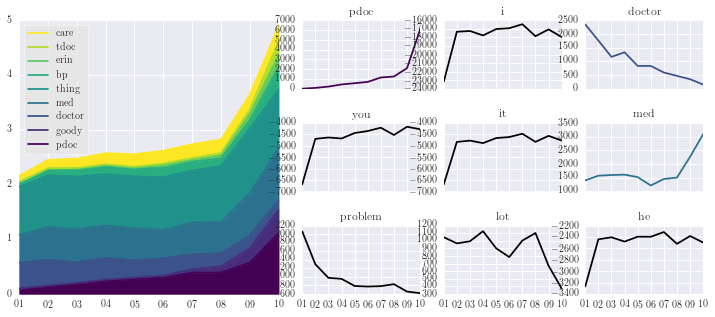

In [69]:
nopro_rel.multiplot({}, {'data': nopro_key.results}, layout=9).show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_xticklabels'

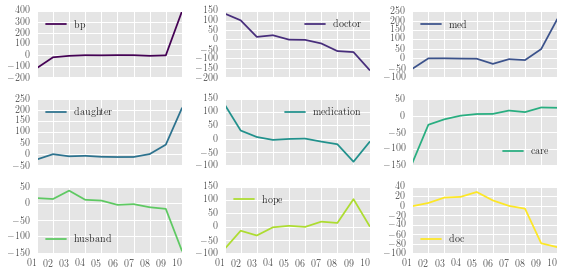

In [30]:
nopro_key = nopro.edit('k', SELF, sort_by='turbulent', skip_entries='pdoc')
nopro_key.visualise(subplots=True, layout=(3,3), colours='viridis').show()

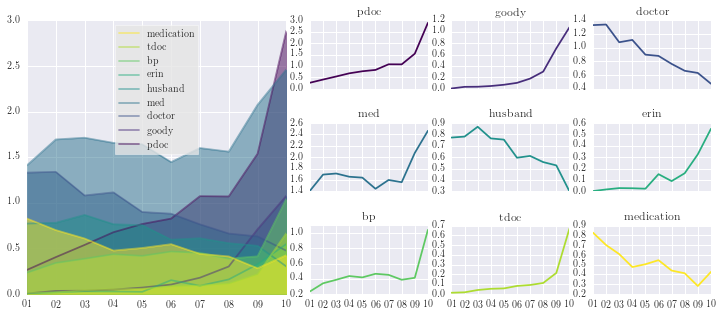

In [20]:
rel_part.multiplot({'stacked': False}, layout=9, colours='viridis').show()

Now, instead of generating relative frequencies, we can get log-likelihood keyness with `'k'`. This compares each subcorpus to the corpus as a
whole. An advantage of the method is that no reference corpus is needed. Also,
because we're looking for key nominal participants, we don't need to exclude a
list of stopwords.

Let's visualise these relative frequencies and keyness scores:

In [11]:
key_part = participants.edit('k', SELF, skip_entries=wordlists.closedclass, 
                             just_entries=r'[A-Za-z0-9]{2,}', sort_by='turbulent')
key_part.results.head()

,pdoc,doctor,bp,med,medication,daughter,husband,care,hope,doc,life,son,problem,family,better,...,friend,mom,wife,question,sense,good,home,alot,diagnosis,illness,idea,seroquel,dose,work,time
01,-651.82,142.87,-114.02,-51.66,133.70,-23.10,17.59,-140.51,-82.78,-0.62,66.49,-8.93,78.37,31.44,-77.92,...,2.04e+01,0.06,0.00,12.63,0,-1.06e+01,0,0.66,0.00e+00,-10.81,0.00e+00,0,0,-1.72e-01,-0.99
02,-273.83,104.80,-18.19,-0.07,32.23,-0.39,14.39,-26.62,-15.11,6.57,13.20,-2.04,23.22,11.39,-0.16,...,8.09e-01,15.76,-0.02,0.03,0,-4.09e-03,0,4.98,-9.88e-03,-5.26,-2.59e+00,0,0,5.84e-02,0.14
03,-147.64,14.65,-5.58,0.01,6.78,-9.60,40.13,-10.64,-33.00,18.27,0.35,-11.90,1.07,2.63,0.57,...,3.92e-01,0.67,-2.56,-1.31,0,9.08e-01,0,1.15,1.07e+00,0.02,0.00e+00,0,0,4.89e-04,-3.43
04,-67.48,23.15,-0.19,-1.09,-4.41,-7.69,11.47,-0.34,-2.73,19.48,1.24,-3.27,-0.06,0.62,-2.56,...,-5.56e-03,1.19,-18.12,0.13,0,1.43e-02,0,-0.04,-9.98e-02,3.92,-2.76e-02,0,0,1.24e+00,7.63
05,-29.79,-0.89,-1.31,-1.84,-1.06,-12.10,8.82,4.72,2.77,29.63,1.12,-20.30,-4.36,1.93,2.32,...,-8.91e+00,-3.28,-0.25,-0.90,0,1.75e+00,0,-0.15,-9.04e-01,7.56,1.54e-07,0,0,1.93e-01,2.44


<module 'matplotlib.pyplot' from '/Users/daniel/virtenvs/ssled/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

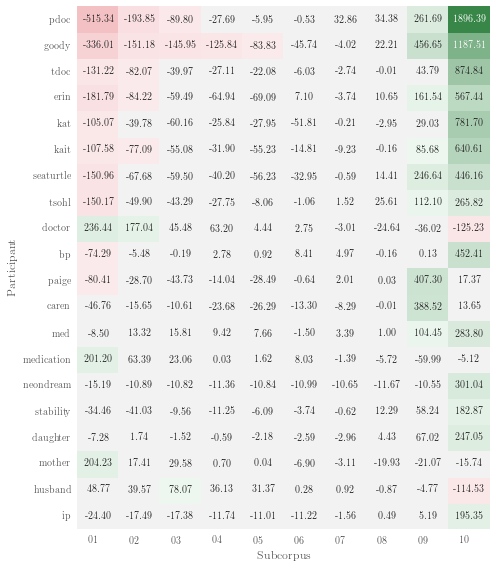

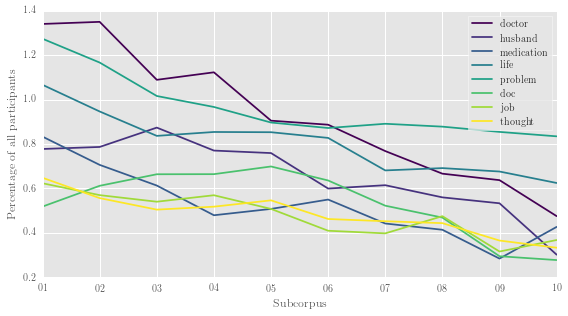

In [104]:
kp = key_part.results.T.iloc[:20,:10]
kpt.visualise(kind='heatmap', num_to_plot=10, y_label='Participant',
              x_label='Subcorpus', figsize=(7, 8)).show()
rp = rel_part.results.iloc[:10,:10]
rp.visualise(num_to_plot=8, figsize=(8,4.5), 
             y_label='Keyness', x_label='Subcorpus').show()


This much information can be a bit overwhelming. One way to manage this is to
collapse the ten subcorpora into three. We'll also employ a list of words to
exclude, which contains usernames mistakenly analysed as regular nouns,
brackets, and stylised kisses (*xx*).

In [13]:
mergs = {'Early stages': ['01', '02', '03'],
         'Mid stages': ['04', '05', '06', '07'],
         'Late stages': ['08', '09', '10']}

badwords = ['kat', 'tsohl', 'neondream', '-lrb-', '-llb-', 'gatsbyluvr1920',
            'steamroll', 'zoeee', 'xx', 'heather', 'cofeegirl', 'whiskey']

#data = corpus.interrogate({F: roles.participant}, exclude={P: r'^(PRP|NNP)'}, show=L)

d2 = nom_participants.edit('k', SELF,
               sort_by='increase',
               just_entries=r'^[A-Za-z0-9-\.]{2,}$', 
               replace_names=r'\.',
               skip_entries=wordlists.closedclass + badwords,
               merge_subcorpora=mergs)

# reorder the stages
d2.results = d2.results.T[['Early stages', 'Mid stages', 'Late stages']].T

# show top results
top = d2.topwords(n=25,df=True)
untop = d2.topwords(n=25,df=True,sort='reverse')

In [14]:
top

Early stages         Mid stages       Late stages       
         Result      %      Result     %      Result      %
0       bipolar -60.13      person -8.35        pdoc 123.87
1        doctor -32.11        good -5.81         med  15.39
2       problem  -7.93         lot -1.52        able  11.05
3          life  -7.46          be -1.28       thing   5.92
4       husband  -7.15      effect -1.25      better   3.84
5          take  -4.93          go -0.25        sure   2.58
6          know  -2.72         way -0.13         way   1.92
7        friend  -1.42        time -0.07          do   1.10
8          help  -0.91  depression -0.00      friend   0.35
9            go  -0.71        talk -0.00        have   0.33
10       effect  -0.29        hard -0.00        help   0.29
11          see  -0.28        care -0.00        time   0.28
12          get  -0.10     feeling -0.00        good   0.17
13         work  -0.04         doc -0.00      person   0.06
14          say  -0.00  medication -0.00         see   0.01
15          lot  -0.00        make -0.00        make   0.00
16   medication  -0.00        know -0.00        post   0.00
17   depression  -0.00     husband -0.00        care   0.00
18      feeling  -0.00         say -0.00        work  -0.02
19         talk  -0.00        post -0.00          be  -0.03
20         make  -0.00        work  0.00         get  -0.04
21          doc  -0.00        have  0.01         say  -0.25
22         hard   0.11         get  0.01         lot  -0.46
23           be   0.30      better  0.23        take  -0.49
24         have   0.42       thing  0.54  depression  -0.68

In [15]:
untop

Early stages         Mid stages       Late stages       
         Result      %      Result     %      Result      %
0          pdoc 152.69     bipolar 50.99      doctor -19.28
1          care  16.48        pdoc 25.11         doc  -8.59
2          post  10.93         med 11.27     husband  -8.48
3          able   9.29      friend  8.39     bipolar  -7.03
4           med   7.59        help  5.90  medication  -6.86
5         thing   6.63     problem  4.77        life  -3.41
6        person   5.15        take  4.22        hard  -2.61
7        better   4.69        able  3.37     feeling  -2.47
8          good   4.66         see  1.01        talk  -2.45
9           way   4.01        sure  0.98     problem  -1.27
10         sure   1.85      doctor  0.71      effect  -1.11
11         time   0.71        life  0.59          go  -0.92
12           do   0.66          do  0.57        know  -0.71
13         have   0.42       thing  0.54  depression  -0.68
14           be   0.30      better  0.23        take  -0.49
15         hard   0.11         get  0.01         lot  -0.46
16          doc  -0.00        have  0.01         say  -0.25
17         make  -0.00        work  0.00         get  -0.04
18         talk  -0.00        post -0.00          be  -0.03
19      feeling  -0.00         say -0.00        work  -0.02
20   depression  -0.00     husband -0.00        care   0.00
21   medication  -0.00        know -0.00        post   0.00
22          lot  -0.00        make -0.00        make   0.00
23          say  -0.00  medication -0.00         see   0.01
24         work  -0.04         doc -0.00      person   0.06

In [21]:
from corpkit import *
from corpkit.dictionaries import *
%matplotlib inline
nom_participants = load('../new_thesis/saved_interrogations/P-parsed-parts-minimal')

badwords = ['kat', 'tsohl', 'neondream', '-lrb-', '-llb-', 'gatsbyluvr1920',
            'steamroll', 'zoeee', 'xx', 'heather', 'cofeegirl', 'whiskey']

rel_inc_part = nom_participants.edit('%', SELF,
               sort_by='increase',
               just_entries=r'^[A-Za-z0-9-\.]{2,}$', 
               replace_names=r'\.',
               skip_entries=wordlists.closedclass + badwords)

In [22]:
rel_dec_part = rel_inc_part.results.loc[:,::-1].iloc[:,:20]

In [30]:
% matplotlib inline
from corpkit.interrogation import Interrodict
x = Interrodict({'increasing': rel_inc_part.results, 'decreasing': rel_dec_part})
x.save('../sfl_corpling/saved_interrogations/inc-dec-part')
#w
#plt.tight_layout()
#plt.show()
#d3.results.iloc[:10,:20].visualise(kind='line', num_to_plot=10, y_label='Participant',
#                       colours='viridis',
#                       x_label='Subcorpus', figsize=(7, 9)).show()
#d4.results.iloc[:10,:20].visualise(kind='line', num_to_plot=10, y_label='Participant',
#                       colours='viridis',
#                       x_label='Subcorpus', figsize=(7, 9)).show()


14:39:12: Data saved: ../sfl_corpling/saved_interrogations/inc-dec-part



<a name="jargonisation"></a>
### Jargonisation

> Forthcoming

<a name="metadiscourse"></a>
### Metadiscourse

> Forthcoming

<a name="vague-language"></a>
### Vague language

> Forthcoming

<a name="key-processes"></a>
### Key processes

For processes, we'll also use a massive list of verbs, in order to control for
parsing errors.

In [6]:
processes = corpus.interrogate({F: roles.event}, show=L, spelling='UK')

In [13]:
keyprocesses = corpus.processes.edit('k', SELF, just_entries=list(verbs),
                                     spelling='UK', sort_by='decrease')
keyprocesses.results

,diagnose,hug,start,thank,please,suffer,continue,love,welcome,eye,want,allow,put,need,call,...,torment,dope,bury,preach,bang,cringe,scratch,stage,investigate,damn,bail,assign,cherish,mourn,agree
01,908.41,-152.07,182.03,-60.29,117.43,173.87,-17.45,-4.65,-126.99,-30.27,43.05,-15.57,62.53,-45.10,-6.58,...,-5.14,-4.87,-5.14,-5.14,-5.14,-5.14,-5.14,-5.41,-5.41,-5.68,-5.68,-5.68,-5.68,-5.68,-61.51
02,66.59,-71.29,6.22,355.50,-0.72,16.64,-8.63,-14.30,-103.80,-19.93,5.48,-3.42,5.62,-17.69,-4.26,...,-3.47,-3.67,-4.08,-4.28,-4.28,-3.88,-3.88,-4.28,-4.08,-4.08,-4.08,-4.08,-3.88,-3.88,-11.41
03,0.65,-42.96,5.55,79.01,-0.30,2.75,-2.43,-0.64,-65.75,-16.78,12.28,-1.32,7.10,-6.60,-0.02,...,-3.91,-4.12,-3.29,-3.91,-3.70,-4.32,-3.91,-4.12,-4.32,-3.70,-3.70,-3.91,-3.91,-4.12,-17.65
04,-5.82,-21.23,2.24,17.93,-1.36,-2.28,-5.16,-1.20,-41.41,-12.36,1.88,-10.07,-0.16,-0.01,0.96,...,-3.42,-3.64,-4.06,-4.28,-3.85,-3.85,-4.06,-3.42,-3.85,-3.64,-3.85,-4.28,-4.28,-4.06,1.89
05,-22.85,-10.84,-0.79,0.44,-0.09,-1.83,-2.55,-4.49,-2.12,-5.85,-1.22,-0.18,3.03,-0.02,-1.85,...,-3.72,-4.34,-3.51,-3.31,-3.93,-3.93,-3.51,-4.13,-2.69,-4.13,-2.89,-3.72,-4.13,-3.93,2.32
06,-73.15,0.66,-3.99,-0.24,-0.09,-1.11,-2.26,-0.01,-3.75,3.81,-1.39,-0.23,-9.44,0.36,-0.00,...,-4.09,-3.89,-3.69,-3.69,-3.69,-3.89,-4.09,-3.48,-3.89,-3.89,-4.30,-3.07,-4.09,-4.30,15.58
07,-75.81,-9.88,-7.24,-3.70,-13.70,-7.18,-1.70,-0.19,11.58,57.51,-0.49,-0.67,-2.98,4.61,0.00,...,-4.09,-3.70,-3.51,-3.51,-3.31,-3.70,-3.51,-3.90,-3.51,-3.31,-3.51,-3.31,-2.73,-3.90,6.37
08,-97.72,-0.91,-6.47,-12.98,-4.13,-11.59,14.31,13.18,16.04,90.60,-2.50,1.04,-7.10,13.13,0.19,...,-3.98,-3.98,-4.40,-3.77,-3.98,-3.56,-4.19,-3.35,-4.40,-3.35,-3.98,-3.77,-3.35,-3.77,5.52
09,-67.42,523.91,-25.11,-45.88,-1.68,-33.36,10.58,73.20,237.75,-9.04,-1.45,18.05,-9.26,38.48,1.54,...,-3.72,-3.72,-3.72,-3.90,-3.90,-3.35,-3.16,-3.90,-3.72,-3.90,-3.72,-3.90,-3.53,-3.53,1.62
10,-34.61,60.78,-35.89,-237.54,-4.34,-56.93,84.13,2.44,141.00,-8.47,-14.10,53.55,-10.18,46.70,43.17,...,-3.62,-3.26,-3.80,-3.44,-3.44,-3.62,-3.80,-3.26,-3.44,-3.62,-3.62,-3.62,-3.80,-2.35,16.88


<a name="being-and-having-bipolar"></a>
### Being and having bipolar

One central issue in earlier investigations of online support groups has been
the ways in which people ascribe of attribute illness to themselves and to
others. A person can be, have, suffer from, feel, or live with bipolar. Each of
these constructions construes the relationship between the two participants (the
human and the illness) in slightly different ways.

To investigate long term changes in construals of this relationship, we can
again query dependencies. The problem is that each realisation requires its own
query.

In [ ]:
bpword = r'^(bp|bipolar|ii|disorder|bi-polar|bd)'

q = {
    'have bipolar':        {F:  r'(dobj|xcomp)',
                            L:  bpword,
                            GL: r'^have'},
    'diagnosed bipolar':   {F:  r'(xcomp|advcl:as)',
                            GL: r'diagnosed'},
    'suffer from bipolar': {F:  r'(advcl|nmod):from',
                            L:  bpword,
                            GL: r'suffer'},
    'feel bipolar':        {F:  r'(dobj|xcomp)',
                            L:  bpword,
                            GL: r'^feel'},
    'with bipolar':        {F:  r'nmod:with'},
    'be bipolar':          {F:  r'(dobj|xcomp)',
                            L:  bpword,
                            GL: r'^be'},
    #'bipolar person':      {F: r'^(amod|nmod)$',
    #                        L: bpword}
    }

behave = corpus.interrogate(q, show=C)

We then need to edit the results:

In [68]:
behave=behave.edit('%', SELF)

And finally, we can plot what we've found:

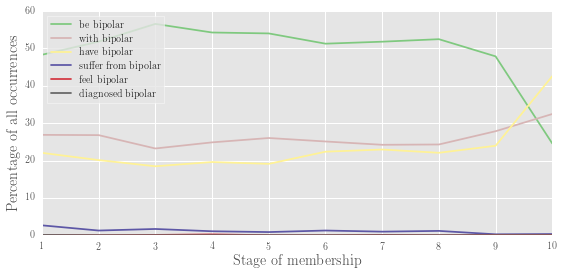

In [69]:
behave.visualise(x_label='Stage of membership', y_label='Percentage of all occurrences').show()

<a name="diagnose-as-process"></a>
### Diagnose as process

*diagnose* is the most key process in first posts. Let's look more closely at
how this process behaves in first and non-first posts.

Below, we get any dependent of diagnose as process/event. This includes
participant and circumstances heads. So that we know which word belongs to which
category, we return a slash-separated function/lemma pair.

In [71]:
diag = corpus.interrogate({GL: 'diagnose', GF: roles.event}, show=[F, L])
diag.results

,auxpass/be,punct/.,nsubjpass/i,cc/and,"punct/,",aux/have,cc/but,advmod/when,advcl/be,advmod/recently,neg/not,nmod:with/disorder,nsubj/i,advmod/just,mark/before,...,nmod:from/doc,nmod:from/doctor,nmod:from/dsm-iv-tr,nmod:from/military,nmod:from/neurologist,nmod:from/there,nmod:from/time,nmod:if/mood,nmod:in/'92,nmod:in/06,nmod:in/1974,nmod:in/1983,nmod:in/1997,nmod:in/1998,acl/go
01,1123,918,763,336,320,311,111,45,100,113,53,128,93,79,24,...,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1
02,486,335,319,114,139,138,49,34,42,40,33,37,35,38,19,...,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
03,314,197,196,62,67,92,44,24,10,20,28,20,18,21,10,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
04,317,194,205,87,90,71,26,30,18,17,29,8,25,17,24,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
05,273,158,191,63,54,57,29,33,14,16,24,9,18,27,28,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
06,219,126,146,56,52,57,15,17,17,11,13,8,15,12,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
07,206,104,139,43,63,48,21,23,15,16,16,5,4,10,17,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
08,208,104,111,46,40,43,13,24,15,9,18,9,12,10,22,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
09,202,89,76,65,34,34,12,22,15,15,17,10,12,7,24,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,213,84,62,61,38,40,9,19,21,8,24,13,6,4,28,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's collapse membership into three stages---it makes it easier to manage
delicate results.

In [72]:
mergs = {'Early stages': ['01', '02', '03'],
         'Mid stages': ['04', '05', '06', '07'],
         'Late stages': ['08', '09', '10']}

order = ["Early stages", "Mid stages", "Late stages"]
merged_diag = diag.edit(merge_subcorpora=mergs)
merged_diag.results = merged_diag.results.reindex(order)

Now, we can extract some specific roles. First, we can get the person being
diagnosed:


15:09:51: images/goal-in-diag-ev.png created.


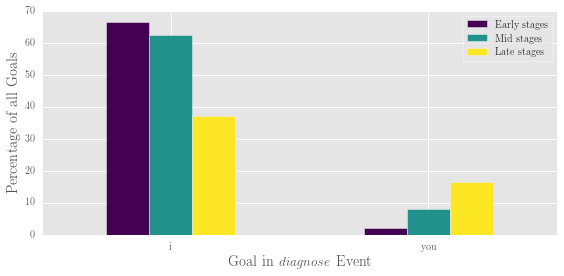

In [73]:
# get just the right role
recipients = merged_diag.edit(just_entries=r'^(nsubjpass|dobj)/.*')
# remove the role info
recipients = recipients.edit(replace_names=r'^.*/')
# get rid of false positive 'diagnosed bipolar'
badwords = ['bp', 'bipolar', 'disorder', 'bi-polar', 'bd', 'hi', 'thanks']
recipients = recipients.edit('%', SELF, skip_entries=badwords, sort_by='decrease')
# get top and bottom, with 'accurately' in the middle
changing=recipients.results[[0, -1]]

changing.visualise(kind='bar', rot=False, transpose=True, save='goal-in-diag-ev'
                   x_label = r'Goal in \emph{diagnose} Event', y_label = 'Percentage of all Goals').show()


We can do the same for circumstances:

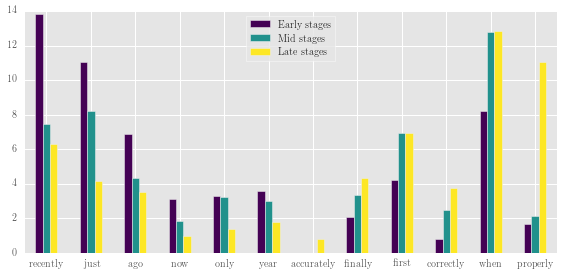

In [74]:
ranges = range(6) + [201] + range(-5,0)
circs = merged_diag.edit(just_entries=roles.circumstance.as_regex(W)
circs = circs.edit('%', SELF, replace_names=r'^.*/', sort_by='decrease')
circs.results[ranges].T.visualise(kind='bar', rot=False).show()

### Nominalisation and grammatical metaphor

We can look at the word classes of diagnose words using either constituency or dependency annotatations:

In [11]:
# faster, with constituencies
diagwc = corpus.interrogate(T, r'__ < /(?i)diagno.*/', show='x', preserve_case=True)
# slower, with dependencies
#diagwc = corpus.interrogate(W, r'diagno', show=X)

Corpus: /Users/daniel/Work/new_thesis/data/P-parsed


In [113]:
wc = diagwc.edit('%', SELF)
wc.results.columns = ['Verb', 'Noun', 'Adjective']


16:36:39: images/wc-diag3.png created.


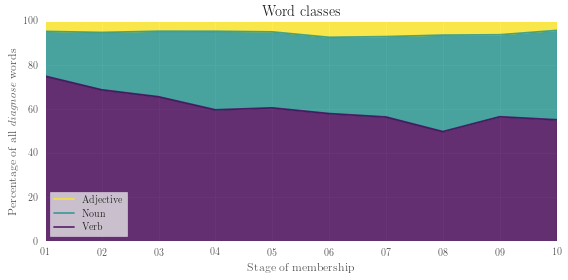

In [114]:
wc.visualise('Word classes', kind='area',ylim=(0, 100), x_label='Stage of membership',
             y_label=r'Percentage of all \emph{diagnose} words',
             colours='viridis', alpha=0.8, save='wc-diag3').show()

We can look at changing grammatical roles more clearly using dependency labels:

In [98]:
# get function of every diagnose word and translate to sfl
# expdiag = corp.interrogate(W, r'diagno', show=F)
expdiag = load('raw-diag')
cong = load('P-parsed-conj-diag')

Conjunctions pose a problem. To fix it:

In [ ]:
conj = corpus.interrogate({F: r'conj:.*', W: r'diagno.*'}, show=GF)

In [110]:
merge = {'Participant': roles.participant.as_regex(W),
         'Process': roles.process.as_regex(W),
         'Circumstance': r'^(n|adv)mod:.*',
         'Quality': ['amod', 'compound', 'nn']}

c = conj.edit(merge_entries=merge)
c = c.edit(merge_entries={'Other': r'^[a-z]'})
d = expdiag.edit(merge_entries=merge)
d = d.edit(merge_entries={'Other': r'^[a-z]'})
e = d.edit('+', c)

In [111]:
e = e.edit('%', SELF)
e.results
e.results = e.results[['Process', 'Participant', 'Circumstance', 'Other', 'Quality']]


16:35:47: images/exp-diag4.png created.


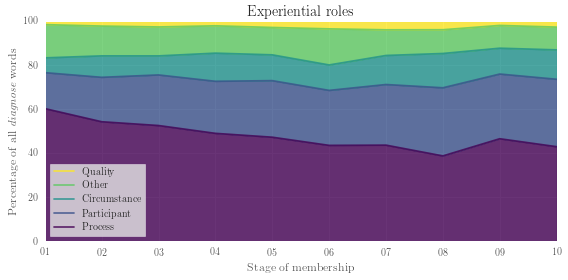

In [112]:
e.visualise('Experiential roles', kind='area',ylim=(0, 100), x_label='Stage of membership',
            y_label=r'Percentage of all \emph{diagnose} words', colours='viridis',
            alpha=0.8, save='exp-diag4', legend_pos='lower left').show()

Another way we might like to do it is by comparing each result to the total numbers of participants and processes:

In [ ]:
# this doesen't work well
# get diagnosis process as percent of all proc, etc
diagnosis = corp.interrogate({W: r'diagnos.s', F: roles.participant}, show=L, multiprocess=2)
diagnose = corp.interrogate({W: r'diagno.*', F: roles.process}, show=L, multiprocess=2)
oth = corp.interrogate({W: r'diagno.*'}, exclude={F: roles.participant + roles.process}, show=L, multiprocess=2)
q = {'Participant': roles.participant, 'Process': roles.process, 'Other': ann}
counts = corp.interrogate(F, q, show=C, multiprocess=2)

part = diagnosis.totals * 100.0 / counts.results['Participant']
proc = diagnose.totals * 100.0 / counts.results['Process']
o = oth.totals * 100.0 / counts.results['Other']

part.name = 'Participant'
proc.name = 'Process'
o.name = 'Other'

df = pd.concat([part, proc, o], axis=1)
df.visualise()



<a name="human-agency"></a>
## Human agency

We can create lists of common related participants in the corpus, and look at
how they are construed differently. The `configurations()` method interrogates a
corpus a number of times, looking for processes a participant is involved in,
modifiers of a participant, etc.

In [ ]:
# get configurations for four participants, save results

parts = {'Self':                ['i', 'myself', 'me'],
         'Other Members':       ['you', 'yourself', 'kat', 'seaturtle', 'dreams',
                                 'tsohl', 'goody', 'llama', 'ruth', 'mud', 'mudhound'],
         'Friends and family':  ['friend', 'mother', 'husband', 'daughter',
                                 'son', 'wife', 'father', 'dad', 'mom', 
                                 'mum', 'erin'],
         'Health professional': ['doc', 'docs', 'doctor', 'doctors', 'dr', 
                                 'dr.', 'drs', 'g.p.', 'gp', 'gps', 'nurse',
                                 'nurses', 'pdoc', 'pdocs', 'psych', 'psychs',
                                 'shrink', 'shrinks', 'tdoc', 'tdocs']
         }
for part, crit in parts.items():
    res = corpus.configurations({W: crit, F: 'participant'}, show=L)
    part_configs[part.lower().replace(' ', '_')] = res
    savename = part
    res.save(savename)
    

In [ ]:
# save along feature, rather than participant, axis
from corpkit import Interrodict
from collections import OrderedDict
od = OrderedDict()
terms = ['and_or', 'premodified', 'postmodified', 'right_participant_in', 'left_participant_in']
for term in terms:
    sd = OrderedDict()
    entries = {k: v for k, v in part_configs.items() if term in k}
    for k, v in sorted(entries.items()):
        sd[k] = v
    entries = Interrodict(sd)
    entries.save('P-parsed-' + term.lower())


15:46:19: images/left_participant_in.png created.


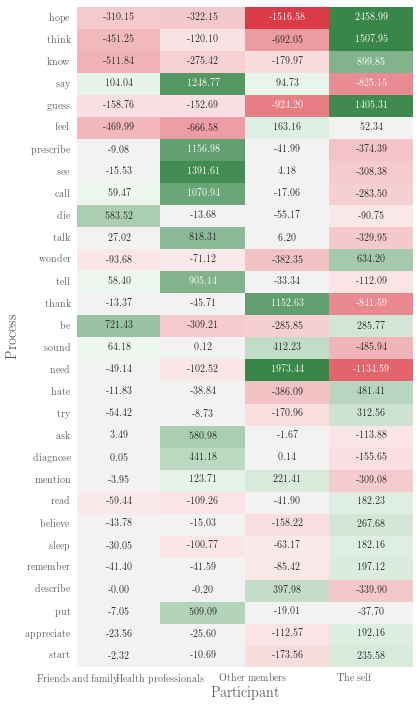

In [84]:
# heatmap of processes for each participant
left_in = left_participant_in.collapse().edit('k', SELF, sort_by = 'turbulent')
left_in.results.index = ['Friends and family', 'Health professionals', 'Other members', 'The self']
left_in.results.iloc[:20,:30].T.visualise(kind='heatmap',figsize=(6,10), robust=True,tex=True, num_to_plot=20, colours='diverge', x_label = 'Participant', y_label = 'Process').show() # save='left_participant_in'

In [86]:
# weird axis participant distribution
#left_in = corpus.left_participant_in.collapse('x').edit('%', SELF, sort_by = 'total')
# this needs to be kludged together, transposed etc
#left_in.visualise(colours='viridis', x_label = 'Membership stage', y_label = 'Percentage of all results').show() # save='agents-by-type'

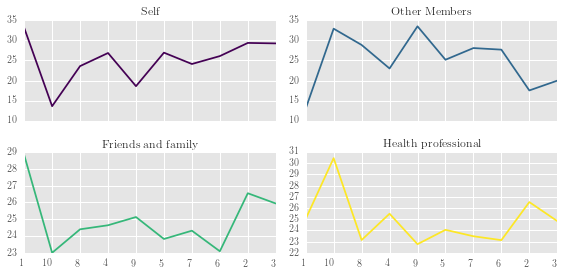

In [87]:
# simpler subplot way to show freq change
li = left_in.results.T.edit('%', SELF, sort_by='total', replace_names={' ': '_'})
li.visualise(subplots=True, layout=(2,2), colours='viridis').show() # save = 'subplots-four-participants-as-agents'

In [ ]:
# not much good :(
coll = corpus.left_participant_in.collapse('x')
coll.results = coll.results.T
coll = coll.edit('%', corpus.participants.totals, sort_by='total')
coll.visualise(colours='viridis', x_label='Membership stage', 
               y_label='Percentage of all results', save='agents-by-type2').show()

In [ ]:
# get overall agency %
from dictionaries import *
parts = {'Self':                {L: ['i', 'myself', 'me'], F: roles.participant},
         'Other members':       {L: ['you', 'yourself', 'kat', 'seaturtle', 'dreams',
                                 'tsohl', 'goody', 'llama', 'ruth', 'mud', 'mudhound'], F: roles.participant},
         'Friends and family':  {L: ['friend', 'mother', 'husband', 'daughter',
                                 'son', 'wife', 'father', 'dad', 'mom', 
                                 'mum', 'erin'], F: roles.participant},
         'Health professionals': {L: ['doc', 'docs', 'doctor', 'doctors', 'dr', 
                                 'dr.', 'drs', 'g.p.', 'gp', 'gps', 'nurse',
                                 'nurses', 'pdoc', 'pdocs', 'psych', 'psychs',
                                 'shrink', 'shrinks', 'tdoc', 'tdocs'], F: roles.participant}}
counts = corpus.interrogate(parts, show=C)

In [66]:
ll = left_participant_in.collapse()
as_left_part = ll.results.sum(axis=1)
as_left_part.index = ['Friends and family', 'Health professionals', 'Other members', 'Self']
as_any_part = counts.results.sum()
as_left_part = as_left_part.sort_index()
as_left_part

Friends and family       15512
Health professionals     14986
Other members            91109
Self                    322008
dtype: int64

In [67]:
as_any_part = as_any_part.sort_index()
as_any_part

Friends and family       23579
Health professionals     19292
Other members           127965
Self                    464557
dtype: int64

In [82]:
relc = as_left_part.edit('%', as_any_part)
reld = as_any_part.edit('%', SELF)

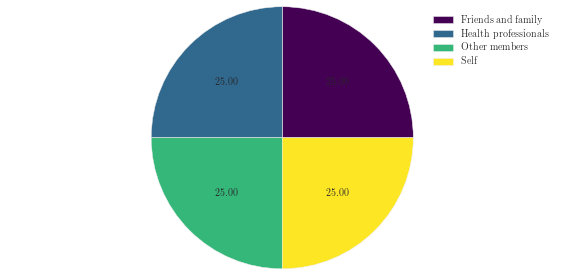

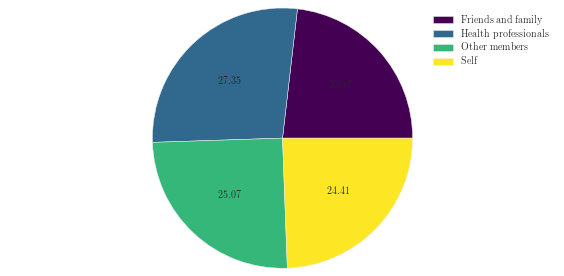

In [84]:
reld.visualise(kind='pie').show()
relc.visualise(kind='pie').show()

In [ ]:
from dictionaries import *
# get overall frequency of these words as nouns or pronouns in the corpus
justcount = {}
for name, query in parts.items():
    query.pop('f', None)
    query['p'] = r'^(N|P).*'
    justcount[name] = query
counts_all = corpus.interrogate(justcount, show=C)
# get percentage as agents
asag = corpus.left_participant_in.collapse('x').results.T
asa = asag.edit('%', counts.results)
asa.visualise(colours='viridis',save='percentage-agent').show()

We can also determine what kind of human agent is involved in four major process
types.

In [8]:
col = corpus.left_participant_in.collapse()
verbal=col.edit(just_entries=processes.verbal.lemmata)
mental=col.edit(just_entries=processes.mental.lemmata)
relational=col.edit(just_entries=processes.relational.lemmata)
material=col.edit(just_entries=processes.material.lemmata)

In [14]:
types = [verbal, mental, relational, material]
df = pd.DataFrame([i.totals for i in types], index=['Verbal', 'Mental', 'Relational', 'Material'])
data = df.T.edit('%', SELF)
nms = ['Friends and family', 'Health professional', 'Other members', 'Self']
data.results.index = nms

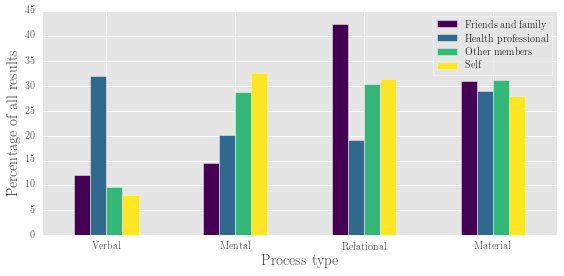

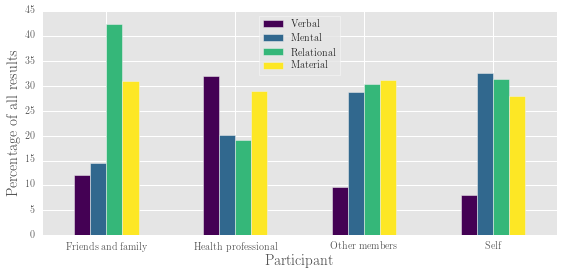

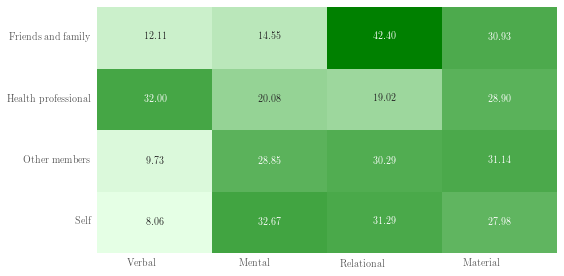

In [18]:
data.results.T.visualise(kind='bar',rot=False, x_label='Process type',
                      y_label='Percentage of all results',).show() # save='process-types-for-part-types'
data.results.visualise(kind='bar',rot=False, x_label='Participant', 
                      y_label='Percentage of all results',).show() # save='process-types-for-part-types-t'
data.results.visualise(kind='heatmap').show() # save='process-types-for-part-types-tx'


<a name="verbal-processes"></a>
## Verbal processes

In [ ]:
verbal = corpus.interrogate({F: roles.event, L: processes.verbal.lemmata}, show = L)
verbal_conc = corpus.concordance({F: roles.event, L: processes.verbal.lemmata}, show = W)
sayers = corpus.interrogate(queries.sayer, show = L)
reg = processes.verbal.words.as_regex()
# get the verbiage
query = r'/S.?/ > (VP <<# (/VB.?/ < /%s/) >+(VP) (VP $ NP))' % reg


<a name="accounting-for-self-selection"></a>
## Accounting for self-selection

A concern with the structure of the corpus being used thus far is that the first
subcorpora contain a far greater number of authors than the later subcorpora.
Subcorpus 10, representing posts 560+, contains posts from only eight different
users.

Thus, it is possible that the current corpus structure does not demonstrate
change in individual users' language choices over the membership course, but
rather, general differences between posts at different stages of membership.
Veteran members' language may change very little, with the prevalence of 'being
bipolar' forms, for example, actually being observed in the posts of users who
do not progress to later membership stages. There may therefore be a self-
selection bias at work.

Veteran Corpus contains only posts from users who contributed more than 30
times. This, however, leaves very few texts in the first few subcorpora. As a
result, it is prudent to merge the first four subcorpora into "01-04". We can
automate this process with a function:



Another way to account for the potential self-selection bias is to compare the
early posts of users who went on to become veterans and the posts of users who
dropped out before this point. This corpus contains two corpora: posts 0--30 of
those who recorded more than 30 posts, and posts 0--30 of those who dropped out
before reaching this point.


Though spatial concerns preclude presentation of every finding in the postcount
corpus with the alternative data structures, in the section below, I return to
previous themes

In [ ]:
def collapse_early(df):
    to_merge = ['01', '02', '03', '04']
    df.ix['01-04'] = df.ix[to_merge].sum()
    df.drop(to_merge, inplace = True)
    df.sort_index(inplace = True)

collapse_early(corpora.V.postags)
collapse_early(corpora.V.wordclasses)
collapse_early(corpora.V.features)

In [ ]:
for cor in corpora:
    derived = derive_features(cor)
    #derived = derived.edit(keep_stats = True)
    name = cor.name.replace('-parsed', '')
    if cor.name.lower().startswith('c'):
        derived.T.visualise('Derived shallow features in %s' % name, figsize=(8, 4),
        rot=False, num_to_plot=8, y_label=False, x_label='Subcorpus',
        show_p_val=True, kind='bar', logy=True).show()
    else:
        k = 'line'
        derived.visualise('Derived shallow features in %s' % name, figsize=(8, 7),
        subplots=True, layout=(4, 2), rot=False, num_to_plot=8,
        y_label=False, x_label='Subcorpus', show_p_val=True).show()

<a name="posts-per-year-images"></a>
### Posts per year images

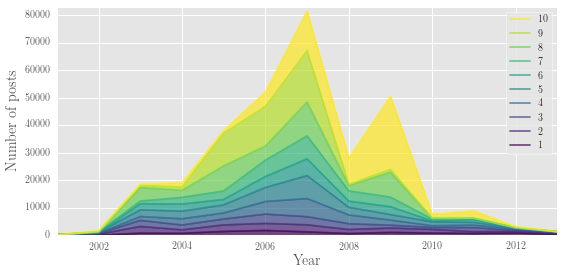

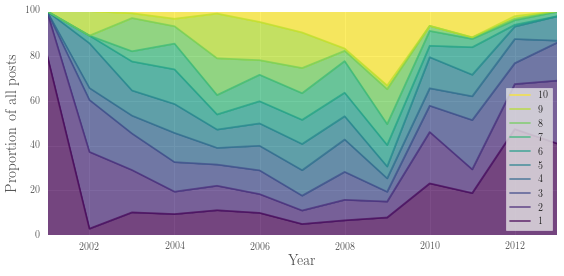

In [5]:
dat = load('postcounts_by_year_data')
dat.T.visualise(kind='area',stacked=True, num_to_plot='all', colours='viridis', 
                legend_pos = 'upper right', grid=True, alpha=0.7, 
                ylim=(0, 83000), y_label='Number of posts', x_label='Year').show()
d = dat.edit('%', SELF)
d.results.T.visualise(kind='area',stacked=True, num_to_plot='all', 
                      colours='viridis', filled=True, legend_pos='lower right', 
                      ylim=(0, 100), grid=True, alpha = 0.7, x_label='Year', 
                      y_label = 'Proportion of all posts').show()

### Example figure for Chapter 4

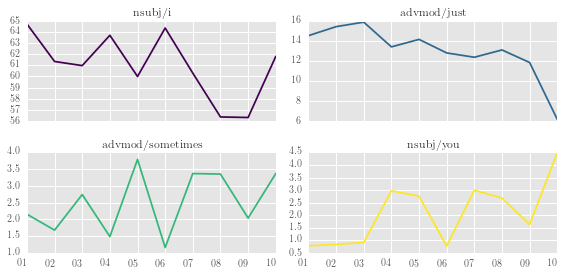

In [6]:
data = corpus.rel_data_for_chap_4_example.results.iloc[:,:4]
data.visualise(rot=False, subplots=True,
               layout=(2,2), y_label=False).show()


17:22:55: images/part-tax-rel-freq2.png created.


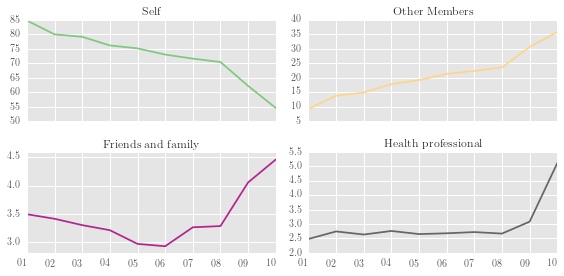

In [75]:
parts = {'Self':                ['i', 'myself', 'me'],
         'Other Members':       ['you', 'yourself', 'kat', 'seaturtle', 'dreams',
                                 'tsohl', 'goody', 'llama', 'ruth', 'mud', 'mudhound'],
         'Friends and family':  ['friend', 'mother', 'husband', 'daughter',
                                 'son', 'wife', 'father', 'dad', 'mom', 
                                 'mum', 'erin'],
         'Health professional': ['doc', 'docs', 'doctor', 'doctors', 'dr', 
                                 'dr.', 'drs', 'g.p.', 'gp', 'gps', 'nurse',
                                 'nurses', 'pdoc', 'pdocs', 'psych', 'psychs',
                                 'shrink', 'shrinks', 'tdoc', 'tdocs']}
fourt = corpus.participants.edit('%', SELF, merge_entries=parts, 
                                 just_entries=parts.keys(), sort_by='total')
fourt.visualise(subplots=True, layout=(2,2), save='part-tax-rel-freq2').show()